/tmp/ipykernel_42149/786232413.py:5: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  data = np.loadtxt('gradient.txt', dtype=np.uint8)


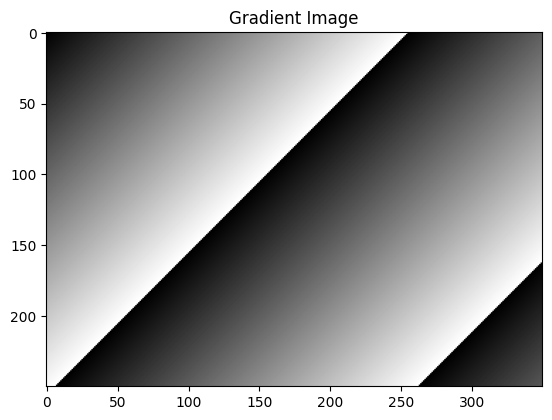

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Read the plain text file
data = np.loadtxt('gradient.txt', dtype=np.uint8)

# Display the image
plt.imshow(data, cmap='gray')
plt.title('Gradient Image')
plt.show()


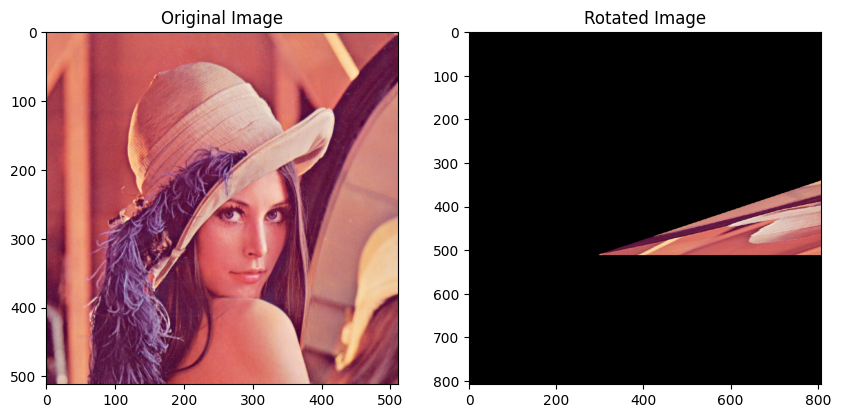

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.ndimage import rotate

def dlr_rotate(image, angle):
    m, n = image.shape[:2]
    alpha = np.radians(angle)
    
    # Calculate the size of the rotated image
    gamma_m = int(np.ceil(n * np.tan(alpha)))
    gamma_n = int(np.ceil(m / np.tan(np.pi/2 - alpha)))
    
    mrt = m + gamma_m
    nrt = n + gamma_n
    
    rotated_image = np.zeros((mrt, nrt, image.shape[2]), dtype=image.dtype)
    
    # Perform the rotation
    for y in range(m):
        for x in range(n):
            new_x = int(nrt - x - (y * np.tan(np.pi / 2 + alpha)))
            new_y = int(m - y * np.tan(alpha))
            
            if 0 <= new_x < nrt and 0 <= new_y < mrt:
                rotated_image[new_y, new_x] = image[y, x]
    
    return rotated_image

# Load and rotate the image
image = plt.imread('./assets/Lenna_test_image.png')
rotated_image = dlr_rotate(image, 30)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_image)
plt.show()


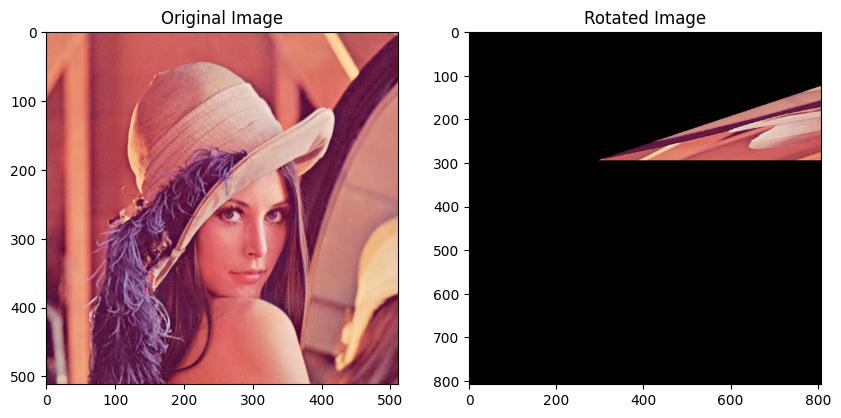

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def dlr_rotate(image, angle):
    m, n = image.shape[:2]
    alpha = np.radians(angle)
    
    if 0 <= angle <= 45:
        # Zone 1
        gamma_m = int(np.ceil(n * np.tan(alpha)))
        gamma_n = int(np.ceil(m / np.tan(np.pi / 2 - alpha)))
        mrt = m + gamma_m
        nrt = n + gamma_n
        
        rotated_image = np.zeros((mrt, nrt, image.shape[2]), dtype=image.dtype)
        
        for y in range(m):
            for x in range(n):
                new_x = int(nrt - x - (y * np.tan(np.pi / 2 + alpha)))
                new_y = int((m - y) * np.tan(alpha))
                
                if 0 <= new_x < nrt and 0 <= new_y < mrt:
                    rotated_image[new_y, new_x] = image[y, x]
    
    elif 45 < angle <= 90:
        # Zone 2
        gamma_m = int(np.ceil(n * np.tan(np.pi / 2 - alpha)))
        gamma_n = int(np.ceil(m / np.tan(alpha)))
        mrt = m + gamma_m
        nrt = n + gamma_n
        
        rotated_image = np.zeros((mrt, nrt, image.shape[2]), dtype=image.dtype)
        
        for y in range(m):
            for x in range(n):
                new_x = int((m - y) * np.tan(alpha))
                new_y = int(nrt - x - (y * np.tan(np.pi / 2 - alpha)))
                
                if 0 <= new_x < nrt and 0 <= new_y < mrt:
                    rotated_image[new_y, new_x] = image[y, x]

    # Add more zones if necessary

    return rotated_image

# Load and rotate the image
image = plt.imread('./assets/Lenna_test_image.png')
rotated_image = dlr_rotate(image, 30)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_image)
plt.show()


In [73]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('./assets/fish.png')
m, n = im.shape[:2]

angle = 30
alpha = np.radians(angle)

s = np.tan(alpha)
sb = np.tan(alpha + np.pi / 2)
gamma_m = int(np.ceil(s * n))
gamma_n = int(np.ceil(m / sb))
mrt = m + gamma_m
nrt = n + gamma_n
fs = lambda y : int(np.ceil(y / sb))

rotated_image = np.zeros((mrt, nrt), dtype=im.dtype)

print(m, n)
print(gamma_n, gamma_m)
print(len(im[:, 0]))
for i in range(m):
    for y in range(n):
        # print(fs(y) + abs(gamma_n), y, end=', ')
        # try: rotated_image[max(0, fs(y) + abs(gamma_n)+  10), y] = im[y, i]
        # print(f'{[max(0, fs(y) + abs(gamma_n)), max(0, y)]} | {[min(y, n-1), i]}')
        # rotated_image[max(0, fs(y) + abs(gamma_n)), max(0, y)] = im[min(y, n-1), i]
        rotated_image[y, max(0, fs(y) + abs(gamma_n))] = im[i, y]
        pass
        # except IndexError: pass
    # print("*")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(im, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_image, cmap='gray')
plt.show()

81 192
-46 111
81


IndexError: index 81 is out of bounds for axis 0 with size 81

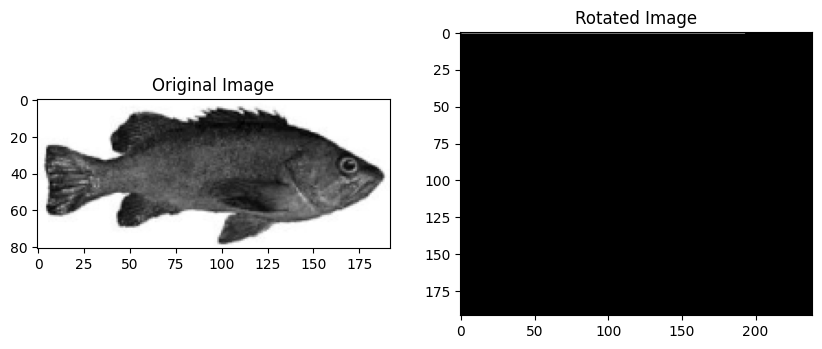

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
im = plt.imread('./assets/fish.png')  # Assuming this is a black and white image
m, n = im.shape[:2]

# Set the rotation angle
angle = 30
alpha = np.radians(angle)

# Calculate the slopes
s = np.tan(alpha)
sb = -1 / s  # cotangent of alpha

# Calculate gamma_m and gamma_n
gamma_m = int(np.ceil(s * n))
gamma_n = int(np.ceil(m / abs(sb)))

# Calculate the size of the rotated image
mrt = m + gamma_m
nrt = n + gamma_n

# Define the start-line function fs
fs = lambda y: int(np.ceil(y / abs(sb)))

# Initialize the rotated image with zeros
rotated_image = np.zeros((mrt, nrt), dtype=im.dtype)

# Perform the rotation using the DLR algorithm for Zone 1
# for y in range(m):
#     for x in range(n):
#         new_x = x + int(np.ceil(s * y))
#         new_y = fs(y)
#         if new_x < nrt and new_y + y < mrt:
#             rotated_image[new_y + y, new_x] = im[y, x]
# for y in range(m):
#     for x in range(n):
#         # Calculate new coordinates based on DLR algorithm
#         new_x = x + int(np.ceil(s * y))
#         new_y = y + int(np.ceil(x * sb))
#         if 0 <= new_x < nrt and 0 <= new_y < mrt:
#             rotated_image[new_y, new_x] = im[y, x]

# Perform the rotation using the revised approach
for y in range(m):
    x_offset = fs(y)
    for x in range(n):
        new_x = x + x_offset
        new_y = y
        if 0 <= new_x < nrt and 0 <= new_y < mrt:
            rotated_image[new_y, new_x] = im[y, x]

# Skew the image along the y direction to achieve the desired rotation
final_rotated_image = np.zeros((mrt, nrt), dtype=im.dtype)
for y in range(mrt):
    y_skewed = y + int(np.ceil(y * sb))
    if 0 <= y_skewed < mrt:
        final_rotated_image[y_skewed, :] = rotated_image[y, :]

# Plot the original and rotated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(final_rotated_image, cmap='gray')

plt.show()


In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
im = plt.imread('./assets/fish.png')  # Assuming this is a black and white image
m, n = im.shape[:2]

# Set the rotation angle
angle = 30
alpha = np.radians(angle)

# Calculate the slope and cotangent
s = np.tan(alpha)
sb = -1 / s  # cotangent of alpha

# Calculate gamma_m and gamma_n
gamma_m = int(np.ceil(s * n))
gamma_n = int(np.ceil(m * abs(sb)))

# Calculate the size of the rotated image
mrt = m + gamma_m
nrt = n + gamma_n

# Initialize the rotated image with zeros
rotated_image = np.zeros((mrt, nrt), dtype=im.dtype)

# Define the function fs
def fs(y):
    return int(np.ceil(y / abs(sb)))

# Perform the rotation using the revised approach
 # Perform the rotation
for i in range(m):
    for j in range(n):
        # Calculate the coordinates in the rotated image
        x = j
        y = i
        xr = int(x * np.cos(alpha) - y * np.sin(alpha))
        yr = int(x * np.sin(alpha) + y * np.cos(alpha))
        
        # Calculate the starting points
        xs = int(yr / sb)
        ys = int(xr * sb)
        
        # Map the pixel to the new coordinates
        rotated_image[ys + gamma_m : ys + gamma_m + 2, xs : xs + 2] = image[i, j]
# Plot the original and rotated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(rotated_image, cmap='gray')

plt.show()


ValueError: could not broadcast input array from shape (3,) into shape (2,2)

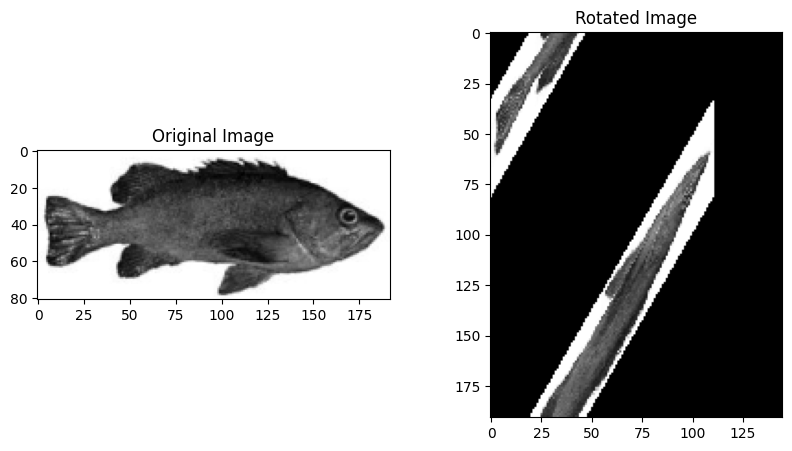

In [103]:
import numpy as np
import matplotlib.pyplot as plt

def DLR_rotate_image(image, angle):
    # Convert angle from degrees to radians
    alpha = np.radians(angle)
    
    # Calculate the size of the rotated image
    m, n = image.shape[:2]
    S = np.tan(alpha)
    Sb = np.tan(alpha + np.pi/2)
    
    # Calculate the size of the target image
    gamma_m = int(np.floor(n * S))
    gamma_n = int(np.floor(m / Sb))
    mrt = m + gamma_m
    nrt = n + gamma_n
    
    # Create the target image with the calculated size
    rotated_image = np.zeros((mrt, nrt), dtype=image.dtype)
    
    # Calculate the base-line and start-line equations
    f_x = lambda x: int(np.floor(S * x))
    fs_y = lambda y: int(np.floor(y / Sb))
    
    # Perform the DLR rotation
    for x in range(m):
        for y in range(n):
            # Calculate the corresponding coordinates in the target image
            X = m - y + fs_y(x)
            Y = f_x(y)
            
            # Map the pixel from the original image to the target image
            rotated_image[X, Y] = image[x, y]
    
    # Return the rotated image
    return rotated_image

im = plt.imread('./assets/fish.png')
rotated_image = DLR_rotate_image(im, 30)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(rotated_image, cmap='gray')

plt.show()

nrt=233, mrt=167


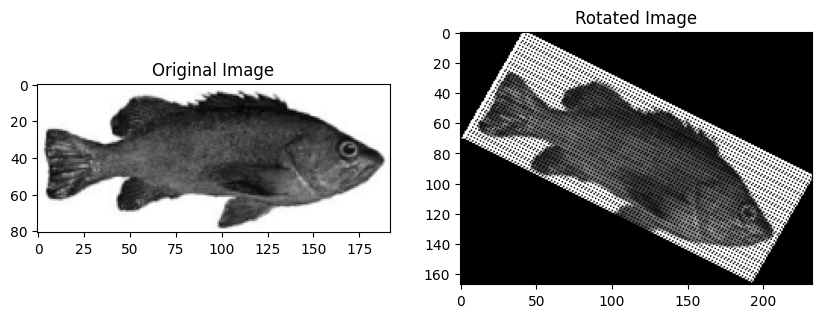

In [35]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('./assets/fish.png')
m, n = img.shape[:2]

angle = 30
alpha = np.radians(30)

nrt = int(np.ceil(m * np.sin(alpha))) + n
mrt = int(np.ceil(m * np.cos(alpha) + n * np.sin(alpha)))
print(f"{nrt=}, {mrt=}")

rot = np.zeros((mrt, nrt), dtype=img.dtype)

x_offset = int(np.ceil(m * np.sin(alpha)))

rise = n * np.sin(alpha)
run = n * np.cos(alpha)
max_start_y = int(np.ceil(m * np.cos(alpha)))
fs = lambda y: y / np.tan(alpha + np.pi / 2)

y_incr = np.floor(n / rise)
x_incr = np.floor(n / run)

# print(img[20, 50]) # Y, X
if y_incr > x_incr:
    mod_factor = y_incr // x_incr
    for line in range(max_start_y):
        a, b = int(np.ceil(fs(line))), line
        # how many times does it stack up in the x axis? (x_incr)
        # 5 / 4.33 = 1 times
        # how many times does it stack up in the y axis? (y_incr)
        # 5 / 2.5 = 2 times
        # this means, in every 2 iterations, y increases by 1, x increases by 2 itself
        # more generally, if x_incr/y_incr > 1, (x_incr/y_incr) can be treated as a mod factor wrt x and vice-versa
        # if y_incr > x_incr:
        #     mod_factor = y_incr // x_incr
        for pixel in range(n):
            # print(f"{(a + x_offset, b)} maps to {(pixel, line)}, i.e {img[line][pixel]}")
            rot[b, a + x_offset] = img[line, pixel]
            a += 1
            if pixel > 0 and pixel % mod_factor == 0:
                b += 1
        # print("----")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(rot, cmap='gray')

plt.show()